In [1]:
# Ìè∞Ìä∏Íπ®Ïßê

!pip install koreanize_matplotlib -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 51.6 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/BigContest

/content/drive/MyDrive/BigContest


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# Specify encoding as cp949 to handle potential encoding issues
df_info = pd.read_csv('dataset1_info.csv', encoding='cp949')
df_monthly = pd.read_csv('dataset2_monthly_usage.csv', encoding='cp949')
df_customer = pd.read_csv('dataset3_customer_info.csv', encoding='cp949')

# 2. Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú (Í≤∞Ï∏°Ïπò Î∞è ÌÉÄÏûÖ Î≥ÄÌôò)
# -999999.9 Í∞íÏùÑ NaNÏúºÎ°ú Î≥ÄÍ≤Ω
df_monthly.replace(-999999.9, np.nan, inplace=True)
df_customer.replace(-999999.9, np.nan, inplace=True)

# TA_YMÏùÑ datetimeÏúºÎ°ú Î≥ÄÌôò
df_monthly['TA_YM'] = pd.to_datetime(df_monthly['TA_YM'], format='%Y%m')
df_customer['TA_YM'] = pd.to_datetime(df_customer['TA_YM'], format='%Y%m')

# 3. Îç∞Ïù¥ÌÑ∞ ÌÜµÌï©
# ÏõîÎ≥Ñ Ïù¥Ïö© Ï†ïÎ≥¥ÏôÄ Í≥†Í∞ù Ï†ïÎ≥¥Î•º Î®ºÏ†Ä Ìï©Ïπ®
df_merged = pd.merge(df_monthly, df_customer, on=['ENCODED_MCT', 'TA_YM'], how='left')

# Í∞ÄÎßπÏ†ê Í∞úÏöî Ï†ïÎ≥¥ÏôÄ ÏµúÏ¢Ö ÌÜµÌï©
df_final = pd.merge(df_merged, df_info, on='ENCODED_MCT', how='left')

print("ÏµúÏ¢Ö ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î™®Ïñë:", df_final.shape)
df_final.head()

ÏµúÏ¢Ö ÌÜµÌï© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î™®Ïñë: (86590, 38)


ENCODED_MCT      TA_YM MCT_OPE_MS_CN           RC_M1_SAA  \
0  000F03E44A 2024-04-01      4_50-75%            5_75-90%   
1  000F03E44A 2023-12-01      4_50-75%  6_90%Ï¥àÍ≥º(ÌïòÏúÑ 10% Ïù¥Ìïò)   
2  002816BA73 2024-04-01      2_10-25%            3_25-50%   
3  002816BA73 2024-11-01      2_10-25%            3_25-50%   
4  002816BA73 2024-06-01      2_10-25%            4_50-75%   

       RC_M1_TO_UE_CT     RC_M1_UE_CUS_CN      RC_M1_AV_NP_AT      APV_CE_RAT  \
0            5_75-90%            5_75-90%            5_75-90%         1_ÏÉÅÏúÑ1Íµ¨Í∞Ñ   
1  6_90%Ï¥àÍ≥º(ÌïòÏúÑ 10% Ïù¥Ìïò)  6_90%Ï¥àÍ≥º(ÌïòÏúÑ 10% Ïù¥Ìïò)  6_90%Ï¥àÍ≥º(ÌïòÏúÑ 10% Ïù¥Ìïò)             NaN   
2            4_50-75%            4_50-75%            2_10-25%  6_ÏÉÅÏúÑ6Íµ¨Í∞Ñ(ÌïòÏúÑ1Íµ¨Í∞Ñ)   
3            4_50-75%            4_50-75%            2_10-25%  6_ÏÉÅÏúÑ6Íµ¨Í∞Ñ(ÌïòÏúÑ1Íµ¨Í∞Ñ)   
4            4_50-75%            4_50-75%            2_10-25%         1_ÏÉÅÏúÑ1Íµ¨Í∞Ñ   

   DLV_SAA_RAT  M1_SME_RY_SAA_RAT  ...  RC_M1_SHC_WP_UE_CLN_RAT  \
0          NaN                2.6  ...                     12.5   
1          NaN                0.0  ...                      NaN   
2          NaN               96.6  ...                     23.8   
3          NaN              108.0  ...                     11.5   
4          NaN               74.2  ...                     17.4   

   RC_M1_SHC_FLP_UE_CLN_RAT           MCT_BSE_AR         MCT_NM  MCT_BRD_NUM  \
0                      75.0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ ÏôïÏã≠Î¶¨Î°ú4Í∞ÄÍ∏∏ 9           Ïú°Ïú°**          NaN   
1                       NaN  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ ÏôïÏã≠Î¶¨Î°ú4Í∞ÄÍ∏∏ 9           Ïú°Ïú°**          NaN   
2                      52.4   ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨ Ï≤≠Í≥ÑÏ≤úÎ°ú10ÎÇòÍ∏∏ 78  ÏûêÍ∞à***********          NaN   
3                      76.9   ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨ Ï≤≠Í≥ÑÏ≤úÎ°ú10ÎÇòÍ∏∏ 78  ÏûêÍ∞à***********          NaN   
4                      69.6   ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨ Ï≤≠Í≥ÑÏ≤úÎ°ú10ÎÇòÍ∏∏ 78  ÏûêÍ∞à***********          NaN   

   MCT_SIGUNGU_NM  HPSN_MCT_ZCD_NM  HPSN_MCT_BZN_CD_NM     ARE_D  MCT_ME_D  
0          ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨       Ï§ëÏãù-Îî§ÏÑ¨/Ï§ëÏãùÎßåÎëê                  ÎöùÏÑ¨  20220225       NaN  
1          ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨       Ï§ëÏãù-Îî§ÏÑ¨/Ï§ëÏãùÎßåÎëê                  ÎöùÏÑ¨  20220225       NaN  
2          ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨             ÏöîÎ¶¨Ï£ºÏ†ê                 ÎßàÏû•Îèô  20140507       NaN  
3          ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨             ÏöîÎ¶¨Ï£ºÏ†ê                 ÎßàÏû•Îèô  20140507       NaN  
4          ÏÑúÏö∏ ÏÑ±ÎèôÍµ¨             ÏöîÎ¶¨Ï£ºÏ†ê                 ÎßàÏû•Îèô  20140507       NaN  

[5 rows x 38 columns]

In [5]:
# ----------------------------------------
# 3. ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ (Feature Engineering)
# ----------------------------------------
print("\n--- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏãúÏûë ---")

# 3-1. Íµ¨Í∞ÑÌòï Îç∞Ïù¥ÌÑ∞Î•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
# Ïòà: '4_50-75%' -> 4
def get_rank_from_category(data):
    if pd.isna(data):
        return np.nan
    try:
        # '_'Î•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ Ï≤´ Î≤àÏß∏ ÏöîÏÜå(ÏàúÏúÑ)Î•º Ï†ïÏàòÌòïÏúºÎ°ú Î∞òÌôò
        return int(str(data).split('_')[0])
    except:
        return np.nan

# Î≥ÄÌôòÌï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
rank_cols = ['MCT_OPE_MS_CN', 'RC_M1_SAA', 'RC_M1_TO_UE_CT', 'RC_M1_UE_CUS_CN', 'RC_M1_AV_NP_AT', 'APV_CE_RAT']
for col in rank_cols:
    df_final[col + '_RANK'] = df_final[col].apply(get_rank_from_category)

print("Íµ¨Í∞ÑÌòï Îç∞Ïù¥ÌÑ∞ -> Ïà´ÏûêÌòï ÏàúÏúÑ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÏôÑÎ£å.")

# 3-2. ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ ÌôúÏö©
df_final['ARE_D'] = pd.to_datetime(df_final['ARE_D'], format='%Y%m%d', errors='coerce')
df_final['MCT_ME_D'] = pd.to_datetime(df_final['MCT_ME_D'], format='%Y%m%d', errors='coerce')

# Î∂ÑÏÑù ÏãúÏ†ê(ÎßàÏßÄÎßâ Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä Ïõî)
latest_month = df_final['TA_YM'].max()

# Ï¥ù Ïö¥ÏòÅ Í∏∞Í∞Ñ (Ïùº) Í≥ÑÏÇ∞
df_final['MCT_OPE_DAYS'] = (latest_month - df_final['ARE_D']).dt.days
print("Ï¥ù Ïö¥ÏòÅ Í∏∞Í∞Ñ(Ïùº) Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å.")

# 3-3. Ï£ºÏöî Í≥†Í∞ùÏ∏µ Ïª¨Îüº ÏÉùÏÑ±
# ÏÑ±Î≥Ñ/Ïó∞Î†πÎåÄ ÎπÑÏú® Ïª¨ÎüºÎßå ÏÑ†ÌÉù
demo_cols = ['M12_MAL_1020_RAT', 'M12_MAL_30_RAT', 'M12_MAL_40_RAT', 'M12_MAL_50_RAT', 'M12_MAL_60_RAT',
             'M12_FME_1020_RAT', 'M12_FME_30_RAT', 'M12_FME_40_RAT', 'M12_FME_50_RAT', 'M12_FME_60_RAT']

# Í∞Å Ìñâ(Í∞ÄÎßπÏ†ê-Ïõî)ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ ÎπÑÏú®ÏùÑ Ï∞®ÏßÄÌïòÎäî Í≥†Í∞ùÏ∏µ Ï∞æÍ∏∞
df_final['MAIN_CUSTOMER'] = df_final[demo_cols].idxmax(axis=1)
# Ïª¨ÎüºÎ™ÖÏóêÏÑú RAT Ï†úÍ±∞ Îì± Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨
df_final['MAIN_CUSTOMER'] = df_final['MAIN_CUSTOMER'].str.replace('M12_', '').str.replace('_RAT', '').str.replace('MAL', 'ÎÇ®ÏÑ±').str.replace('FME', 'Ïó¨ÏÑ±')
print("Ï£ºÏöî Í≥†Í∞ùÏ∏µ Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å.")
print("--- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏôÑÎ£å ---\n")


--- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏãúÏûë ---
Íµ¨Í∞ÑÌòï Îç∞Ïù¥ÌÑ∞ -> Ïà´ÏûêÌòï ÏàúÏúÑ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÏôÑÎ£å.
Ï¥ù Ïö¥ÏòÅ Í∏∞Í∞Ñ(Ïùº) Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å.
Ï£ºÏöî Í≥†Í∞ùÏ∏µ Ïª¨Îüº ÏÉùÏÑ± ÏôÑÎ£å.
--- ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅ ÏôÑÎ£å ---



/tmp/ipython-input-92366900.py:41: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df_final['MAIN_CUSTOMER'] = df_final[demo_cols].idxmax(axis=1)


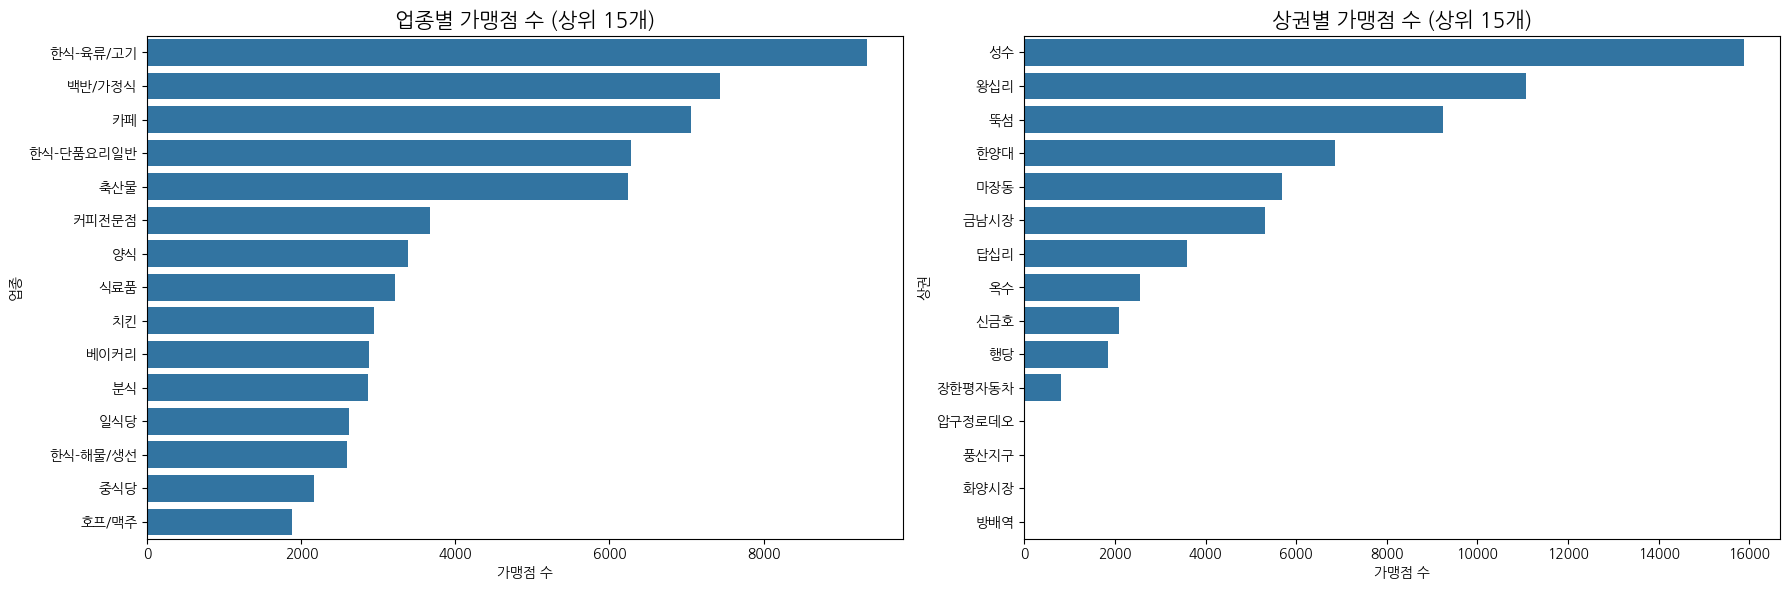

In [6]:
# EDA, ÏãúÍ∞ÅÌôî

# 1. Ï†ÑÎ∞òÏ†ÅÏù∏ Í∞ÄÎßπÏ†ê Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(18, 6))

# ÏóÖÏ¢ÖÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò
plt.subplot(1, 2, 1)
sns.countplot(y='HPSN_MCT_ZCD_NM', data=df_final, order=df_final['HPSN_MCT_ZCD_NM'].value_counts().index[:15])
plt.title('ÏóÖÏ¢ÖÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò (ÏÉÅÏúÑ 15Í∞ú)', fontsize=15)
plt.xlabel('Í∞ÄÎßπÏ†ê Ïàò')
plt.ylabel('ÏóÖÏ¢Ö')

# ÏÉÅÍ∂åÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò
plt.subplot(1, 2, 2)
sns.countplot(y='HPSN_MCT_BZN_CD_NM', data=df_final, order=df_final['HPSN_MCT_BZN_CD_NM'].value_counts().index[:15])
plt.title('ÏÉÅÍ∂åÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò (ÏÉÅÏúÑ 15Í∞ú)', fontsize=15)
plt.xlabel('Í∞ÄÎßπÏ†ê Ïàò')
plt.ylabel('ÏÉÅÍ∂å')

plt.tight_layout()
plt.show()

In [7]:
# ÏóÖÏ¢Ö: Í≥†ÍπÉÏßë, Î∞±Î∞òÏßë, Ïπ¥Ìéò ÏàúÏúºÎ°ú Í≤ΩÏüÅÏù¥ Îπ°ÏÖà
# ÏÑ±Ïàò, ÏôïÏã≠Î¶¨, ÎöùÏÑ¨ Ïù¥Ï™Ω Ìï´ÌîåÏù¥Îùº Í≤ΩÏüÅ Îπ°ÏÖà (Î¨ºÎ°† Í∑∏ÎßåÌÅº Ïú†ÎèôÏù∏Íµ¨ÎèÑ ÎßéÍ≤†ÏßÄÎßå)


# => Ïù¥Î†áÍ≤å Í≤ΩÏüÅÏù¥ Ïã¨Ìïú ÏóÖÏ¢ÖÏù¥ÎÇò ÏúÑÏπòÏóê ÏûàÎäî Í∞ÄÍ≤åÏóêÍ≤å, ÏïÑÏßÅ Í≥µÎûµÎêòÏßÄ ÏïäÏùÄ Í≥†Í∞ùÏ∏µ(ex. 40ÎåÄ Ïó¨ÏÑ±), ÏãúÍ∞ÑÎåÄ (ex. Ïã¨Ïïº ÏòÅÏóÖ), ÏÑúÎπÑÏä§ (ÌòºÎ∞• ÎßûÏ∂§ Î©îÎâ¥)Î•º Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú Ï∞æÏïÑÎÇ¥ÏÑú
# "ÏÇ¨Ïû•Îãò! Ïù¥ ÏãúÏû•ÏùÄ ÏïÑÏßÅ Ìï† Îßå Ìï¥Ïöî! Ïù¥Îü∞ Í±∏ Ï∂îÍ∞ÄÌïòÎ©¥ Ï¢Ä ÎπÑÎπå Ïàò ÏûàÏñ¥Ïöî!" Ïù¥Îü∞ ÎäêÎÇåÏúºÎ°ú Ï†úÏïàÌïòÎäî ÏóêÏù¥Ï†ÑÌä∏

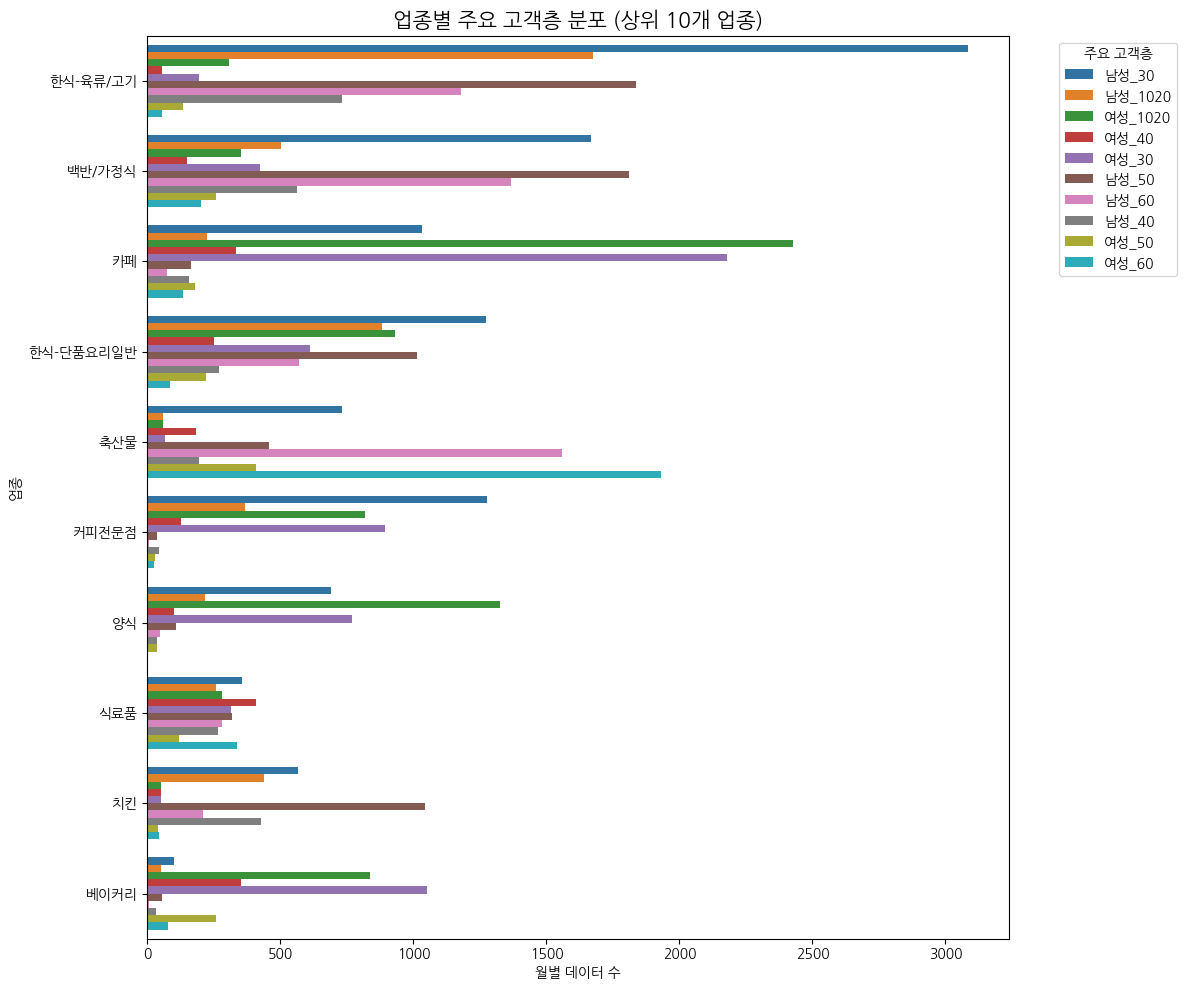

In [8]:
# 2. ÏóÖÏ¢ÖÎ≥Ñ Ï£ºÏöî Í≥†Í∞ùÏ∏µ Î∂ÑÏÑù
plt.figure(figsize=(12, 10))
# ÏóÖÏ¢Ö ÏÉÅÏúÑ 10Í∞úÎßå ÌïÑÌÑ∞ÎßÅ
top10_industry = df_final['HPSN_MCT_ZCD_NM'].value_counts().index[:10]
df_top10_industry = df_final[df_final['HPSN_MCT_ZCD_NM'].isin(top10_industry)]

sns.countplot(y='HPSN_MCT_ZCD_NM', hue='MAIN_CUSTOMER', data=df_top10_industry,
              order=top10_industry, dodge=True)
plt.title('ÏóÖÏ¢ÖÎ≥Ñ Ï£ºÏöî Í≥†Í∞ùÏ∏µ Î∂ÑÌè¨ (ÏÉÅÏúÑ 10Í∞ú ÏóÖÏ¢Ö)', fontsize=15)
plt.xlabel('ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò')
plt.ylabel('ÏóÖÏ¢Ö')
plt.legend(title='Ï£ºÏöî Í≥†Í∞ùÏ∏µ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [9]:
# ÏàòÏöîÏôÄ Í≥µÍ∏â ..

# Í≥†ÍπÉÏßë: 30ÎåÄ ÎÇ®ÏÑ± ÏïïÎèÑÏ†Å
# Î∞±Î∞ò/Í∞ÄÏ†ïÏãù: 30, 50, 60ÎåÄ ÎÇ®ÏÑ± ÏïïÎèÑÏ†Å
# Ïπ¥Ìéò: 102030 Ïó¨ÏÑ± ÏïïÎèÑÏ†Å
# ÌïúÏãù-Îã®ÌíàÏöîÎ¶¨ÏùºÎ∞ò: 30ÎåÄ ÎÇ®ÏÑ±Ïù¥ Ï†úÏùº ÎÜíÍ≥† // 50ÎåÄ ÎÇ®ÏÑ±>1020Ïó¨ÏÑ±>1020ÎÇ®ÏÑ± ÏàúÏÑúÎ°ú ÎπÑÎì±ÎπÑÎì±
# Ï∂ïÏÇ∞Î¨º: 60ÎåÄ Ïó¨ÏÑ±>60ÎåÄ ÎÇ®ÏÑ± ÏïïÎèÑÏ†Å
# Ïª§ÌîºÏ†ÑÎ¨∏Ï†ê: 30ÎåÄ ÎÇ®ÏÑ± ÏïïÎèÑÏ†Å (ÏôúÏßÄ?) / Í∑∏Îã§ÏùåÏùÄ 30ÎåÄ Ïó¨ÏÑ±>1020Ïó¨ÏÑ±
# ÏñëÏãù: 1020Ïó¨ÏÑ±>>30Ïó¨ÏÑ±>30ÎÇ®ÏÑ±
# ÏãùÎ£åÌíà: 40Ïó¨ÏÑ±>30ÎÇ®ÏÑ±>60Ïó¨ÏÑ± Ïù∏Îç∞ Í±∞Ïùò Îã§ ÎπÑÎì±ÎπÑÎì±Ìï®
# ÏπòÌÇ®: 50ÎåÄ ÎÇ®ÏÑ± ÏïïÎèÑÏ†Å (ÏïÑÎπ†Í∞Ä ÏπòÌÇ®ÏÇ¨ÏôÄÏÑú Í∑∏Îü∞Í∞Ä?) / 30ÎÇ®ÏÑ±>1020ÎÇ®ÏÑ±>40ÎÇ®ÏÑ±
# Î≤†Ïù¥Ïª§Î¶¨: 30Ïó¨ÏÑ±>1020Ïó¨ÏÑ± ÏïïÎèÑÏ†Å


# Îã§Î•∏ Í∞ÄÍ≤å(ÌèâÍ∑†)ÏôÄ Ïö∞Î¶¨ Í∞ÄÍ≤åÎ•º ÎπÑÍµê
# ex. Ïö∞Î¶¨ Ïπ¥ÌéòÎäî Îã§Î•∏ Ïπ¥ÌéòÏôÄ Îã§Î•¥Í≤å 40ÎåÄ ÎÇ®ÏÑ± ÏÜêÎãòÏù¥ ÎßéÎÑ§? Ïù¥Î∂ÑÎì§ÏùÑ Îã®Í≥®Î°ú ÎßåÎì§ 'ÎÇ®ÏÑ± Ï∑®Ìñ• Î©îÎâ¥? ÎîîÏ†ÄÌä∏?'Î•º Í∞úÎ∞úÌïòÍ±∞ÎÇò Í¥ÄÎ†® SNS ÌôçÎ≥¥ Î¨∏Íµ¨Î•º ÏûëÏÑ±Ìï¥ ÎìúÎ¶¥ÍπåÏöî?
# Ïù¥Îü∞ ÎäêÎÇåÏúºÎ°ú, Ïö∞Î¶¨ Í∞ÄÍ≤åÎßåÏùò Í∞ïÏ†êÏùÑ ÏÇ¥Î¶¨Í±∞ÎÇò ÏïΩÏ†êÏùÑ Î≥¥ÏôÑÌïòÎäî ÎßûÏ∂§Ìòï Ï†úÏïàÏùÑ ÏÉùÏÑ±ÌïòÎäî AI ÏóêÏù¥Ï†ÑÌä∏ (LLM ÌôúÏö©ÏùÑ Ïûò Ìï† Ïàò ÏûàÎäî Ï£ºÏ†ú)


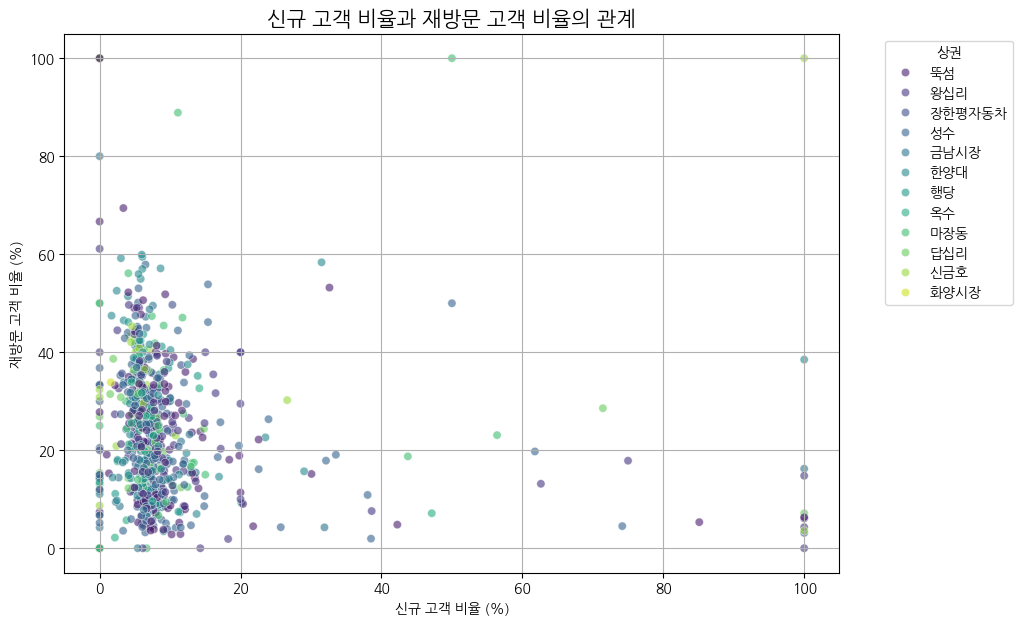

In [10]:
# 3. ÏÑ±Í≥º ÏßÄÌëú Î∂ÑÏÑù: Ïû¨Î∞©Î¨∏Ïú® vs Ïã†Í∑úÍ≥†Í∞ù ÎπÑÏú®
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_final.sample(1000), x='MCT_UE_CLN_NEW_RAT', y='MCT_UE_CLN_REU_RAT',
                hue='HPSN_MCT_BZN_CD_NM', palette='viridis', alpha=0.6)
plt.title('Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú®Í≥º Ïû¨Î∞©Î¨∏ Í≥†Í∞ù ÎπÑÏú®Ïùò Í¥ÄÍ≥Ñ', fontsize=15)
plt.xlabel('Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú® (%)')
plt.ylabel('Ïû¨Î∞©Î¨∏ Í≥†Í∞ù ÎπÑÏú® (%)')
plt.legend(title='ÏÉÅÍ∂å', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [11]:
# 1. ÏÜåÏàòÏùò Ïã†Í∑ú Í≥†Í∞ù (0~20), Ïû¨Î∞©Î¨∏ Í≥†Í∞ù ÎπÑÏú® (0~60)
  # Í∏∞Ï°¥ Í≥†Í∞ùÏùÑ ÏñºÎßàÎÇò Ïûò Îã®Í≥®Î°ú ÎßåÎìúÎäêÎÉê!!Í∞Ä Ï§ëÏöî
# 2. Ïù¥ÏÉÅÏπò
  # xÏ∂ï Ïò§Î•∏Ï™Ω ÎÅù: Ïó•? Ïã†Í∑ú Í≥†Í∞ù 100%Ïù∏Îç∞ Ïû¨Î∞©Î¨∏ Í≥†Í∞ù ÎπÑÏú®ÎèÑ 20%Ïù∏ Í∞ÄÍ≤åÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÎÇò?
  # Ïû¨Î∞©Î¨∏ Í≥†Í∞ù ÎπÑÏú®Ïù¥ 20%Î©¥ Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú®ÏùÄ 80%Ïó¨Ïïº ÌïòÎäî Í±∞ ÏïÑÎãåÍ∞Ä?
  # Ïñ¥ÎñªÍ≤å ÏÇ∞Ï∂úÎêú Ïª¨ÎüºÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î¥êÏïºÌï† Í≤É Í∞ôÏùå.

#

In [12]:
###### Í∞ÄÍ≤åÏùò ÏÉùÏï†Ï£ºÍ∏∞Ïóê ÎßûÏ∂∞ÏÑú Ï°∞Ïñ∏Ìï¥Ï£ºÎäî Agent #####

# Ïã†Í∑ú Ïò§ÌîàÍ∏∞: Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú® 80% Ïù¥ÏÉÅ
# Ï≤´Ïù∏ÏÉÅÏù¥ Ï§ëÏöîÌï¥Ïöî!
# ÎßàÏºÄÌåÖ: Ï≤´ Î∞©Î¨∏ Í≥†Í∞ùÏóêÍ≤å, Ïû¨Î∞©Î¨∏ Ïãú ÏÇ¨Ïö©Í∞ÄÎä•Ìïú ÌååÍ≤©Ï†ÅÏù∏ Ïø†Ìè∞ Ï†úÍ≥µ. Ï≤´ Îã®Í≥® ÌôïÎ≥¥Ïóê ÏßëÏ§ëÌïòÏÑ∏Ïöî.
# ÎßåÏ°±Ìïú Í≥†Í∞ùÏóêÍ≤å SNS Î¶¨Î∑∞Î•º Ïú†ÎèÑÌï† Ïàò ÏûàÎäî ÏÑúÎπÑÏä§Î•º Ï†úÍ≥µÌï¥ÏÑú Ïò®ÎùºÏù∏ ÏûÖÏÜåÎ¨∏ÏùÑ ÎßåÎìúÏÑ∏Ïöî. (LLMÏúºÎ°ú Î¶¨Î∑∞ ÏöîÏ≤≠ Î¨∏Íµ¨ ÏÉùÏÑ±ÌïòÍ∏∞)

# ÎòêÎäî Ïã†Í∑ú ÎπÑÏú®ÏùÄ ÎÜíÏùÄÎç∞ Ïû¨Î∞©Î¨∏Ïú®Ïù¥ ÎÇÆÏúºÎ©¥? (Ïù¥Í±∏ Ïñ¥ÎñªÍ≤å Ïã†Í∑ú Ïò§ÌîàÏù¥Îûë Í∑∏ÎÉ• ÏÉàÎ°ú Ïò§Í∏∞Îßå ÌïòÎäî Í∞ÄÍ≤åÎûë ÎπÑÍµêÌïòÏßÄ?)
# ÎßàÏºÄÌåÖÏúºÎ°ú ÏÜêÎãòÏùÄ Ïûò ÎÅåÏñ¥Ïò§ÎäîÎç∞, Ï†ïÏûë Ïó¨Í∏∞ Ïò® ÏÜêÎãòÎì§Ïù¥ ÎßåÏ°± Î™ªÌïòÎäî Ïú†Ìòï
# ÏÇ¨Ïû•Îãò! Í¥ëÍ≥†ÎπÑÎäî Í∑∏Îßå Ïì∞Í≥†, ÌôïÎ≥¥Îêú Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î°ú Îßõ, Í∞ÄÍ≤©, ÏÑúÎπÑÏä§ ÎßåÏ°±ÎèÑÏóê ÎåÄÌïú Î¶¨Î∑∞ Î∂ÑÏÑùÏùÑ Î®ºÏ†Ä Ìï¥ÏïºÌï¥Ïöî!
# Ïû¨Î∞©Î¨∏Ïú®Ïù¥ ÎÇÆÏùÄ ÌïµÏã¨ ÏõêÏù∏ÏùÑ Ï∞æÏïÑ Ìï¥Í≤∞Ìï¥Ïöî!

#######################
# ÏïàÏ†ï ÏÑ±Ïû•Í∏∞: Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú® 5~20, Ïû¨Î∞©Î¨∏Ïú® 40 Ïù¥ÏÉÅ
# ÏÇ¨Ïû•Îãò Í∞ÄÍ≤åÎäî ÏïàÏ†ïÏ†ÅÏù∏ Îã®Í≥®Ï∏µÏùÑ Í∏∞Î∞òÏúºÎ°ú Ïûò ÏÑ±Ïû•ÌïòÍ≥† ÏûàÏñ¥Ïöî! Ïù¥Ï†ú Îã®Í≥® Í≥†Í∞ùÏùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏó¨ Ïù¥ÌÉàÏùÑ ÎßâÏïÑÎ¥êÏöî!
# Îã®Í≥® Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÏÑùÌï¥ÏÑú 'Í∞ÄÏû• Ïù∏Í∏∞ÏûàÎäî Î©îÎâ¥? ÏÇ¨ÎûëÎ∞õÎäî Î©îÎâ¥?' Ìï†Ïù∏ Ïù¥Î≤§Ìä∏ Í∏∞Ìöç!
# ÎòêÎäî Îã®Í≥® ÏÜêÎãòÎì§ÌïúÌÖåÎßå Ï†úÍ≥µÎêòÎäî 'ÏãúÌÅ¨Î¶ø Î©îÎâ¥' Í∞úÎ∞úÌï¥ÏÑú ÌäπÎ≥ÑÌïú Í≤ΩÌóò ÏÑ†Î¨º Ïù¥Î≤§Ìä∏

# Í∑ºÎç∞ Îã®Í≥® Ïû•ÏÇ¨Î°ú ÏïàÏ†ïÏ†ÅÏùº ÏàòÎäî ÏûàÏñ¥ÎèÑ Ï¢Ä Í≥†Ïù∏Î¨º Îê† Ïàò ÏûàÏùå. ÏÉàÎ°úÏö¥ Í≥†Í∞ùÏù¥ ÏïàÏò§Î©¥ Ïñ¥Îñ°Ìï®.
# ÏÇ¨Ïû•Îãò! ÏÜåÏ§ëÌïú Îã®Í≥®Î∂ÑÎì§ÏùÑ ÌôúÏö©Ìï¥ÏÑú 'ÏπúÍµ¨ Ï∂îÏ≤ú Ïù¥Î≤§Ìä∏'ÎÇò 'Îã®Í≥® Ïù∏Ï¶ù SNS Ï±åÎ¶∞ÏßÄ'Î°ú ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïã†Í∑ú Í≥†Í∞ùÏùÑ Ïú†ÏπòÌï¥Î¥êÏöî!

###############
# Ï†ïÏ≤¥, ÏúÑÍ∏∞Í∏∞: Ïã†Í∑ú Í≥†Í∞ù ÎπÑÏú® 5 Ïù¥Ìïò, Ïû¨Î∞©Î¨∏Ïú® 30 Ïù¥Ìïò
# ÏÇêÏö©ÏÇêÏö©!! Ï¥ùÏ≤¥Ï†Å ÎÇúÍµ≠!!
# ÏÇ¨Ïû•Îãò! Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖÏù¥ Ï§ÑÍ≥†, Í∏∞Ï°¥ Îã®Í≥® ÏÜêÎãòÎèÑ Îú∏Ìï¥Ïöî! ÏúÑÌóò Ïã†Ìò∏Í∞Ä Í∞êÏßÄÎêêÏñ¥Ïöî!
# ÏßÄÍ∏àÎ∂ÄÌÑ∞Í∞Ä Î∞òÏ†Ñ. Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§!!
# ÌïúÎèôÏïà Ïïà Ïò® ÏÜêÎãòÎì§ÏóêÍ≤å Í∞êÏÑ±Ï†ÅÏù∏ Î©îÏãúÏßÄÏôÄ Ìï®Íªò Ìï†Ïù∏ Ïø†Ìè∞ÏùÑ Î≥¥ÎÇ¥Î≥¥ÏÑ∏Ïöî
# Ï£ºÎ≥Ä ÏßÄÏó≠ (Í±∞Ï£º/ÏßÅÏû•) Í≥†Í∞ùÏùÑ ÌÉÄÍ≤üÏúºÎ°ú Ìïú 'ÎèôÎÑ§ Ï£ºÎØº Ìï†Ïù∏' Ïù¥Î≤§Ìä∏Î•º ÌÜµÌï¥ ÏÉàÎ°úÏö¥ Îã®Í≥®ÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏÑ∏Ïöî (LLMÏúºÎ°ú Î©îÏãúÏßÄ Ï¥àÏïà ÏûëÏÑ±)
# Í∞ÄÍ≤åÏùò Ï°¥Ïû¨Í∞êÏùÑ Îã§Ïãú ÏïåÎ†§ÏïºÌï¥Ïöî!! Ï£ºÎ≥Ä ÏßÄÏó≠ ÌÉÄÍ≤üÏúºÎ°ú SNS Í¥ëÍ≥†ÎèÑ ÌïòÍ≥†, ÌååÍ≤©Ï†ÅÏù∏ Ïã†Î©îÎâ¥ Ï∂úÏãúÌï¥ÏïºÎèºÏöî!!


/tmp/ipython-input-997358286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delivery['IS_DELIVERY_MAJOR'] = df_delivery['DLV_SAA_RAT'] > 50


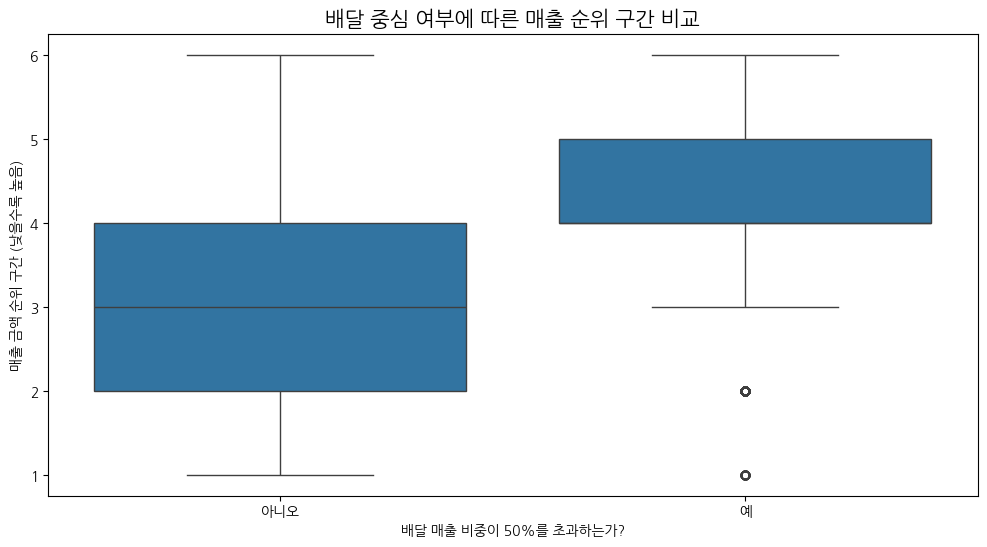

In [13]:
# 4. Î∞∞Îã¨ Îß§Ï∂úÏùò ÏòÅÌñ•Î†•
df_delivery = df_final.dropna(subset=['DLV_SAA_RAT'])
df_delivery['IS_DELIVERY_MAJOR'] = df_delivery['DLV_SAA_RAT'] > 50

plt.figure(figsize=(12, 6))
sns.boxplot(x='IS_DELIVERY_MAJOR', y='RC_M1_SAA_RANK', data=df_delivery)
plt.title('Î∞∞Îã¨ Ï§ëÏã¨ Ïó¨Î∂ÄÏóê Îî∞Î•∏ Îß§Ï∂ú ÏàúÏúÑ Íµ¨Í∞Ñ ÎπÑÍµê', fontsize=15)
plt.xlabel('Î∞∞Îã¨ Îß§Ï∂ú ÎπÑÏ§ëÏù¥ 50%Î•º Ï¥àÍ≥ºÌïòÎäîÍ∞Ä?')
plt.ylabel('Îß§Ï∂ú Í∏àÏï° ÏàúÏúÑ Íµ¨Í∞Ñ (ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùå)')
plt.xticks([False, True], ['ÏïÑÎãàÏò§', 'Ïòà'])
plt.show()

In [14]:
# # Ïò§. Î∞∞Îã¨ ÎπÑÏ§ëÏù¥ Ï†ÅÏùÄ Í∞ÄÍ≤åÏùºÏàòÎ°ù Îß§Ï∂úÏù¥ Îçî ÎÜíÏùå.
# ÎáåÌîºÏÖú: Î∞∞Îã¨ÌïòÎäî Í∞ÄÍ≤åÎì§ÏùÄ ÏÉµÏù∏ÏÉµÎèÑ ÎßéÍ≥†... Í±ç Í±∞Í∏∞ÏÑú Í±∞Í∏∞ÏûÑ. Í∑∏Î¶¨Í≥† Í∑∏Îã• ÎπÑÏãº ÏùåÏãùÏùÑ ÌåîÏßÄÎèÑ ÏïäÏùå. Í∞ÄÏÑ±ÎπÑ ÏùåÏãùÎì§. Í∑ºÎç∞ Î∞∞Îã¨Ïù¥ ÏïÑÎãàÎùº Í∞ÄÍ≤å Ï§ëÏã¨Ïù∏ Í≥≥Îì§ÏùÄ Îã®Í≥®ÎèÑ ÎßéÍ≥† ÎäêÎÇå Ï¢ãÏùÄ Ïù∏ÌÖåÎ¶¨Ïñ¥ÎèÑ ÏûàÏùÑ ÌÖåÍ≥†, ÏùåÏãùÎèÑ Ïã†Í≤ΩÏç®ÏÑú ÎßåÎì§Í∏∞ ÎïåÎ¨∏Ïóê Ï¢Ä Îçî ÎπÑÏåÄ Í≤É Í∞ôÏùå.

# Í∞ÄÍ≤å ÏóÖÏ¢Ö, ÏÉÅÍ∂å ÌäπÏÑ±, Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Î∂ÑÏÑùÌï¥ÏÑú,
# Î∞∞Îã¨Ïù¥ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî vs ÌôÄ Í≥†Í∞ùÏùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Îäî Í≤å Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî
# ÌôÄ Í≥†Í∞ùÏùò ÎßåÏ°±ÎèÑÎ•º ÎÜíÏù¥Î†§Î©¥ Ïù¥Îü∞ Ïù¥Î≤§Ìä∏Î•º ÌïòÎäî Í±¥ Ïñ¥Îñ†ÏÑ∏Ïöî?
# Îç∞Ïù¥ÌÑ∞Ïóê Í∑ºÍ±∞Ìï¥ÏÑú Î¶¨Ìè¨Ìä∏ Ï†úÍ≥µÌï¥Ï£ºÎäî Agent

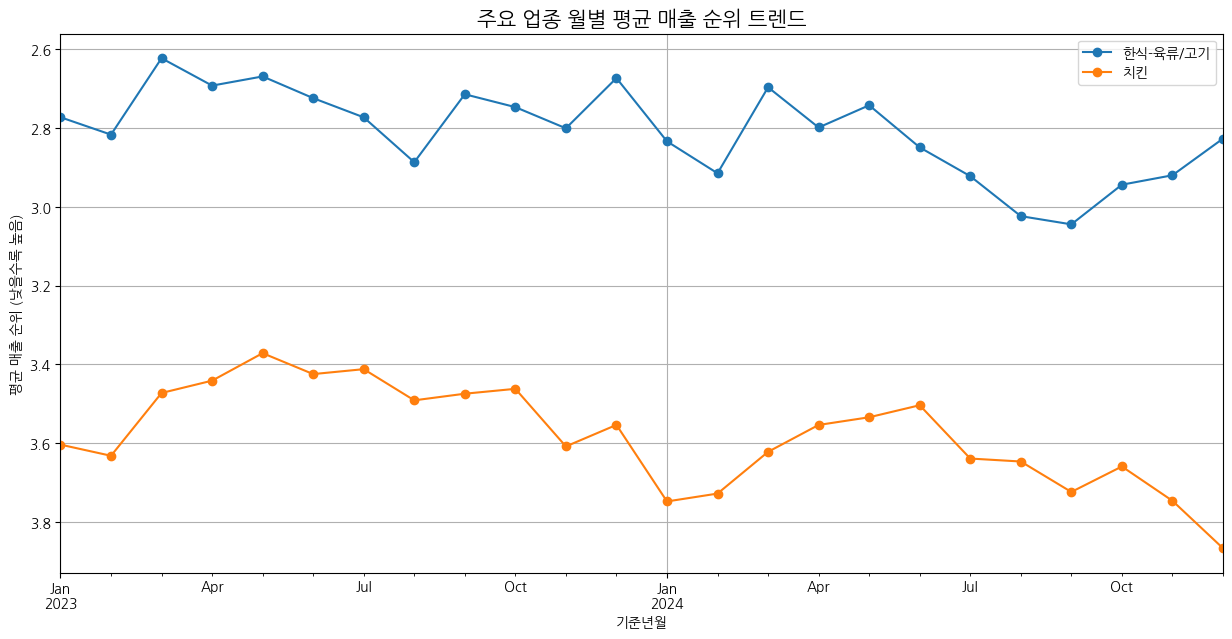

In [15]:
# 5. ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù: ÌäπÏ†ï ÏóÖÏ¢ÖÏùò ÏõîÎ≥Ñ Îß§Ï∂ú Ìä∏Î†åÎìú
plt.figure(figsize=(15, 7))
# 'ÌïúÏãù-Ïú°Î•ò/Í≥†Í∏∞' ÏóÖÏ¢ÖÏùò ÏõîÎ≥Ñ ÌèâÍ∑† Îß§Ï∂ú ÏàúÏúÑ
df_final[df_final['HPSN_MCT_ZCD_NM'] == 'ÌïúÏãù-Ïú°Î•ò/Í≥†Í∏∞'].groupby('TA_YM')['RC_M1_SAA_RANK'].mean().plot(label='ÌïúÏãù-Ïú°Î•ò/Í≥†Í∏∞', marker='o')
# 'ÏπòÌÇ®' ÏóÖÏ¢ÖÏùò ÏõîÎ≥Ñ ÌèâÍ∑† Îß§Ï∂ú ÏàúÏúÑ
df_final[df_final['HPSN_MCT_ZCD_NM'] == 'ÏπòÌÇ®'].groupby('TA_YM')['RC_M1_SAA_RANK'].mean().plot(label='ÏπòÌÇ®', marker='o')

plt.title('Ï£ºÏöî ÏóÖÏ¢Ö ÏõîÎ≥Ñ ÌèâÍ∑† Îß§Ï∂ú ÏàúÏúÑ Ìä∏Î†åÎìú', fontsize=15)
plt.xlabel('Í∏∞Ï§ÄÎÖÑÏõî')
plt.ylabel('ÌèâÍ∑† Îß§Ï∂ú ÏàúÏúÑ (ÎÇÆÏùÑÏàòÎ°ù ÎÜíÏùå)')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis() # ÏàúÏúÑÏù¥ÎØÄÎ°ú yÏ∂ïÏùÑ Îí§ÏßëÏñ¥ÏÑú ÏúÑÎ°ú Í∞àÏàòÎ°ù ÏÑ±Í≥ºÍ∞Ä Ï¢ãÍ≤å ÌëúÏãú
plt.show()

In [16]:
# Ïó∞ÎßêÏóê ÏπòÌÇ®Î≥¥Îã§ Í≥†Í∏∞ ÎßéÏù¥ Î®πÎäîÎìØ? ÌöåÏãùÌï¥ÏÑú Í∑∏Îü∞ Í≤É Í∞ôÏùå
# 2ÎÖÑ Í∞ÑÏùò ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÌï¥ÏÑú
# ÏÇ¨Ïû•Îãò! 12ÏõîÏùÄ Ïó∞ÎßêÏù¥ ÏûàÏñ¥ÏÑú Í≥†ÍπÉÏßë ÏóÖÏ¢ÖÏùò Îß§Ï∂úÏù¥ ÌèâÍ∑† n% ÏÉÅÏäπÌï¥Ïöî! 2Ï£º Ï†ÑÎ∂ÄÌÑ∞ 'Ïó∞Îßê ÌååÌã∞'? ÌîÑÎ°úÎ™®ÏÖòÏùÑ ÏãúÏûëÌïòÎ©¥ Ïñ¥Îñ®ÍπåÏöî?
# Ïù¥Îü∞ ÎäêÎÇåÏúºÎ°ú ÎØ∏Îûò Ïù¥Î≤§Ìä∏ ÏòàÏ∏°ÌïòÍ≥† ÏÑ†Ï†úÏ†ÅÏù∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ Ï†úÏïà
# Seasnoal Marketing

In [18]:
import numpy as np
import pandas as pd

# 1-1. '4_50-75%' ‚Üí 4 (ÏàúÏúÑ)ÏôÄ Ï§ëÏïôÍ∞í ÌçºÏÑºÌä∏(Ïòà: 62.5) Î™®Îëê Ï∂îÏ∂ú
def parse_bucket(s):
    if pd.isna(s):
        return np.nan, np.nan
    s = str(s)
    try:
        rank = int(s.split('_')[0])
    except:
        rank = np.nan
    # ÌçºÏÑºÌä∏ Íµ¨Í∞Ñ Ï∂îÏ∂ú
    try:
        rng = s.split('_', 1)[1]
        if '%' in rng:
            lo, hi = rng.replace('%','').split('-')
            pct = (float(lo) + float(hi)) / 2.0
        elif '90%Ï¥àÍ≥º' in rng:       # ÌïòÏúÑ 10% Ïù¥Ìïò ÌëúÌòÑ Îì± ÏòàÏô∏ Ï≤òÎ¶¨
            pct = 95.0
        elif '10%Ïù¥Ìïò' in rng:
            pct = 5.0
        else:
            pct = np.nan
    except:
        pct = np.nan
    return rank, pct

rank_cols = ['MCT_OPE_MS_CN','RC_M1_SAA','RC_M1_TO_UE_CT','RC_M1_UE_CUS_CN','RC_M1_AV_NP_AT','APV_CE_RAT']
for c in rank_cols:
    df_final[[f'{c}_RANK', f'{c}_PCT']] = df_final[c].apply(lambda x: pd.Series(parse_bucket(x)))

# 1-2. ÏóÖÏ¢Ö/ÏÉÅÍ∂å Í∏∞Ï§Ä ÎπÑÍµêÎ•º ÏúÑÌïú Î∞±Î∂ÑÏúÑ/ÌëúÏ§ÄÌôî Ìó¨Ìçº
def add_group_stats(df, value_col, by_cols, prefix):
    g = df.groupby(by_cols)[value_col]
    df[f'{prefix}_MEAN'] = df.merge(g.mean().rename('m'), left_on=by_cols, right_index=True, how='left')['m']
    df[f'{prefix}_STD']  = df.merge(g.std(ddof=0).rename('s'), left_on=by_cols, right_index=True, how='left')['s']
    df[f'{prefix}_Z']    = (df[value_col] - df[f'{prefix}_MEAN'])/df[f'{prefix}_STD']
    # Î∞±Î∂ÑÏúÑ(Í∑∏Î£π ÎÇ¥ ÏÉÅÎåÄ ÏúÑÏπò)
    df[f'{prefix}_PCTL'] = df.groupby(by_cols)[value_col].rank(pct=True)*100
    return df

# Ïòà: ÏóÖÏ¢Ö ÎÇ¥ Îß§Ï∂úÍµ¨Í∞Ñ(ÎÇÆÏùÑÏàòÎ°ù ÏÉÅÏúÑ) ‚Üí Ïó≠ÏßÄÌëú Ï£ºÏùò: rank ÎÇÆÏùå=Ï¢ãÏùå
df_final = add_group_stats(df_final, 'RC_M1_SAA_RANK', ['HPSN_MCT_ZCD_NM','TA_YM'], 'IND_RANK')

# 1-3. ÏÉÅÍ∂å 15Ï¢Ö ÎùºÎ≤® ÌëúÏ§ÄÌôî(ÎÑ§Ïù¥Î∞ç ÌÜµÏùº)
zone_map = {
 'ÏÑ±Ïàò':'ÏÑ±Ïàò','ÏôïÏã≠Î¶¨':'ÏôïÏã≠Î¶¨','ÎöùÏÑ¨':'ÎöùÏÑ¨','ÌïúÏñëÎåÄ':'ÌïúÏñëÎåÄ','ÎßàÏû•Îèô':'ÎßàÏû•Îèô','Í∏àÎÇ®ÏãúÏû•':'Í∏àÎÇ®ÏãúÏû•',
 'ÎãµÏã≠Î¶¨':'ÎãµÏã¨Î¶¨','Ïò•Ïàò':'Ïò•Ïàò','Ïã†Í∏àÌò∏':'Ïã†Í∏àÌò∏','ÌñâÎãπ':'ÌñâÎãπ','Ïû•ÌïúÌèâÏûêÎèôÏ∞®':'Ïû•ÌïúÌèâÏûêÎèôÏ∞®',
 'ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§':'ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§','ÌíçÏÇ∞ÏßÄÍµ¨':'ÌíçÏÇ∞ÏßÄÍµ¨','ÌôîÏñëÏãúÏû•':'ÌôîÏñëÏãúÏû•','Î∞©Î∞∞Ïó≠':'Î∞©Î∞∞Ïó≠'
}
df_final['BZN_STD'] = df_final['HPSN_MCT_BZN_CD_NM'].map(zone_map).fillna(df_final['HPSN_MCT_BZN_CD_NM'])


In [19]:
# 2-1. Í≥†Í∞ù DNA Î≤°ÌÑ∞(ÏÑ±/Ïó∞Î†π 10D) & Í±∞Ï£º/ÏßÅÏû•/Ïú†Îèô 3D
demo_cols = ['M12_MAL_1020_RAT','M12_MAL_30_RAT','M12_MAL_40_RAT','M12_MAL_50_RAT','M12_MAL_60_RAT',
             'M12_FME_1020_RAT','M12_FME_30_RAT','M12_FME_40_RAT','M12_FME_50_RAT','M12_FME_60_RAT']
flow_cols = ['RC_M1_SHC_RSD_UE_CLN_RAT','RC_M1_SHC_WP_UE_CLN_RAT','RC_M1_SHC_FLP_UE_CLN_RAT']

# 2-2. ÏÉÅÍ∂å√óÏóÖÏ¢ÖÎ≥Ñ ÌèâÍ∑† ÌîÑÎ°úÌååÏùº & Îß§Ï∂ú ÏÉÅÎåÄÏßÄÌëú
dna = (df_final
       .groupby(['BZN_STD','HPSN_MCT_ZCD_NM'], dropna=False)[demo_cols+flow_cols+['M1_SME_RY_SAA_RAT','M1_SME_RY_CNT_RAT','M12_SME_RY_SAA_PCE_RT']]
       .mean(numeric_only=True)
       .reset_index())

# 2-3. ÏÉÅÍ∂åÎ≥Ñ ÎåÄÌëú ÏóÖÏ¢Ö/Í≥†Í∞ù/ÌùêÎ¶Ñ TOP ÌëúÏãú(Í∞ÑÎã® ÌîÑÎ¶∞Ìä∏)
display_cols = ['M1_SME_RY_SAA_RAT','M1_SME_RY_CNT_RAT','M12_SME_RY_SAA_PCE_RT'] + flow_cols
for z in sorted(dna['BZN_STD'].dropna().unique()):
    sub = dna[dna['BZN_STD']==z].sort_values('M1_SME_RY_SAA_RAT', ascending=False).head(5)
    print(f'\n‚ñ∂ ÏÉÅÍ∂å: {z} | ÏóÖÏ¢Ö ÏÉÅÏúÑ(ÏóÖÏ¢ÖÌèâÍ∑† ÎåÄÎπÑ Îß§Ï∂úÎπÑ ÎÜíÏùÄ Ïàú)')
    print(sub[['HPSN_MCT_ZCD_NM','M1_SME_RY_SAA_RAT','M1_SME_RY_CNT_RAT','M12_SME_RY_SAA_PCE_RT']].round(2).to_string(index=False))



‚ñ∂ ÏÉÅÍ∂å: Í±¥ÎåÄÏûÖÍµ¨ | ÏóÖÏ¢Ö ÏÉÅÏúÑ(ÏóÖÏ¢ÖÌèâÍ∑† ÎåÄÎπÑ Îß§Ï∂úÎπÑ ÎÜíÏùÄ Ïàú)
HPSN_MCT_ZCD_NM  M1_SME_RY_SAA_RAT  M1_SME_RY_CNT_RAT  M12_SME_RY_SAA_PCE_RT
       ÎèôÎÇ®ÏïÑ/Ïù∏ÎèÑÏùåÏãù              62.41             100.04                  42.27

‚ñ∂ ÏÉÅÍ∂å: Í∏àÎÇ®ÏãúÏû• | ÏóÖÏ¢Ö ÏÉÅÏúÑ(ÏóÖÏ¢ÖÌèâÍ∑† ÎåÄÎπÑ Îß§Ï∂úÎπÑ ÎÜíÏùÄ Ïàú)
HPSN_MCT_ZCD_NM  M1_SME_RY_SAA_RAT  M1_SME_RY_CNT_RAT  M12_SME_RY_SAA_PCE_RT
    ÏùºÏãù-Ïö∞Îèô/ÏÜåÎ∞î/ÎùºÎ©¥             271.10             927.30                   5.35
             Î∂ÑÏãù             213.50             132.56                  37.32
       ÌïúÏãù-Íµ≠Ïàò/ÎßåÎëê             208.63             235.67                  23.77
          ÌïúÏãù-ÎÉâÎ©¥             169.86             240.22                  14.50
          Ïª§ÌîºÏ†ÑÎ¨∏Ï†ê             159.10             291.91                  20.39

‚ñ∂ ÏÉÅÍ∂å: ÎãµÏã¨Î¶¨ | ÏóÖÏ¢Ö ÏÉÅÏúÑ(ÏóÖÏ¢ÖÌèâÍ∑† ÎåÄÎπÑ Îß§Ï∂úÎπÑ ÎÜíÏùÄ Ïàú)
HPSN_MCT_ZCD_NM  M1_SME_RY_SAA_RAT  M1_SME_RY_CNT_RAT  M12_SME_RY_SAA_P

In [ ]:
# ÏòàÎ•º Îì§Ïñ¥,
# ÏÑ±Ïàò: Í∞êÏûêÌÉï, Íº¨ÏπòÍµ¨Ïù¥, ÎèôÎÇ®ÏïÑÏù∏ÎèÑ
# ÏãùÏÇ¨+Ïà† => Í≤∞Ìï©Ìòï ÏàòÏöîÍ∞Ä ÌèâÍ∑† ÎåÄÎπÑ Í∞ïÌï®. Ïù¥Î≤§Ìä∏(ÌåùÏóÖ Ï†ÑÏãú) Ïú†ÏûÖÍ≥º ÏÉÅÌò∏ÏûëÏö© Í∞ÄÎä•ÏÑ± ÌÅº
# => ÌåùÏóÖ Ïó∞Í≥Ñ ÏòÅÏàòÏ¶ù Ïù∏Ï¶ù ÏΩúÎùºÎ≥¥ / Î∞§ ÌîºÌÅ¨Ïóê ÎßûÏ∂ò Ïã¨Ïïº ÏÑ∏Ìä∏ (Ïà† + ÏïàÏ£º)

# ÏôïÏã≠Î¶¨: ÌîºÏûê, ÏÉ§Î∏åÏÉ§Î∏å
# ÎåÄÌòï ÏÉÅÏòÅÍ¥Ä Ï§ëÏã¨Ïùò Îã®Ï≤¥, Í∞ÄÏ°±, Ïó∞Ïù∏?
# ÌòºÏû° ÏãúÍ∞Ñ ÌîΩÏóÖ ÏòàÏïΩ Ïú†ÎèÑ
# Îã®Ï≤¥ ÏòàÏïΩ Îπ†Î•∏ Í≤∞Ï†ú/Ï¢åÏÑù Î≥¥Ïû•

# ÎßàÏû•Îèô: Ï≤≠Í≥ºÎ¨º, ÌïúÏãùÏú°Î•ò, Î∞±Î∞ò
# Ï∂ïÏÇ∞ÎèÑÎß§ ÏàòÏöî+ÏãùÏÇ¨Ìòï
# Î™ÖÏ†à Ï†ÑÌõÑ 2Ï£º ÏÑ†Ï£ºÎ¨∏
# Ï∫†ÌïëÏãúÏ¶å Î∞ÄÌÇ§Ìä∏, ÏßÑÍ≥µÌè¨Ïû• ÏÑ∏Ìä∏

# Ïò•Ïàò
# Íµ≠Ïàò, ÎßåÎëê, Ïú°Î•ò, Î∂ÑÏãù .. Í±∞Ï£º Ï§ëÏã¨ ÏÉÅÍ∂åÏùò Í∞ÄÏÑ±ÎπÑ ÏãùÏÇ¨
# Í±∞Ï£º Í≥†Í∞ù (Îßò/Í∞ÄÏ°±) ÏßÄÌñ•: Ï£ºÎßê Î∏åÎü∞Ïπò/Í∞ÄÏ°± ÏÑ∏Ìä∏
# ÎèôÎÑ§ Ïª§ÎÆ§ÎãàÌã∞(Îßò Ïπ¥Ìéò) ÌîÑÎ°úÎ™®ÏÖò, ÏòàÏïΩ ÌîΩÏóÖ
# Îã®Í≥® Ï†ÑÏö© Ïø†Ìè∞ÏúºÎ°ú Ï∂©ÏÑ±ÎèÑ Í∞ïÌôî

# Ïã†Í∏àÌò∏: Î∞òÏ∞¨, Ìï¥Î¨º, ÏÉùÏÑ†, Íµ≠Î∞•
# ÏßëÎ∞•, Î∞òÏ∞¨Ìòï. Ïû•Î≥¥Í∏∞, Í∞ÑÌé∏Ïãù.
# Í∞ÄÏ†ï Í∞ÑÌé∏Ïãù Ï†ïÍ∏∞Íµ¨ÎèÖ, ÌîΩÏóÖ
# ÎπÑ Ìè≠ÏóºÎÇ† Î∞∞Îã¨ ÏàòÏöî Í≥µÎûµ

# ÎãµÏã¨Î¶¨: Î≤†Ïù¥Ïª§Î¶¨, Ïù¥ÏûêÏπ¥Ïïº, ÌïúÏãùÎ∑îÌéò
# Ï∂úÌá¥Í∑º, Îì±ÌïòÍµê ÎèôÏÑ†Ïóê ÎßûÏ∂ò ÌîΩÏóÖ ÎπµÏÑ∏Ìä∏/Ïª§Ìîº Ï∂îÏ≤ú
# Ï†ÄÎÖÅ Ïù¥ÏûêÏπ¥Ïïº: ÌèâÏùº ÌïòÏù¥Î≥º 1+1
# ÌïúÏãùÎ∑îÌéò: Îã®Ï≤¥(ÌïôÏõê/ÏßÅÏû•) ÏòàÏïΩ Ìï†Ïù∏ Îì±



In [20]:
# 3-1. Ïö¥ÏòÅÍ∏∞Í∞Ñ(Ïùº) Ïù¥ÎØ∏ Í≥ÑÏÇ∞Îê®: MCT_OPE_DAYS
def lifecycle_seg(days):
    if pd.isna(days): return 'Unknown'
    m = days/30
    if m < 6:   return 'Ïã†Í∑ú'
    if m < 24:  return 'ÏÑ±Ïû•'
    if m < 72:  return 'ÏÑ±Ïàô'
    return 'Ïû•Í∏∞'

df_final['LIFECYCLE'] = df_final['MCT_OPE_DAYS'].apply(lifecycle_seg)

# 3-2. Ï≤¥Î†•ÏßÄÌëú: ÏÉÅÍ∂å/ÏóÖÏ¢Ö ÎÇ¥ Îß§Ï∂ú ÏàúÏúÑ Î∞±Î∂ÑÏúÑ(ÎÇÆÏùÑÏàòÎ°ù ÏÉÅÏúÑ) ‚Üí ÏÉÅÏúÑ/Ï§ëÏúÑ/ÌïòÏúÑ
df_final['RANK_PCT_IN_IND_BZN'] = df_final.groupby(['HPSN_MCT_ZCD_NM','HPSN_MCT_BZN_CD_NM','TA_YM'])['RC_M1_SAA_RANK'].rank(pct=True)
def strength_bucket(p):
    if pd.isna(p): return 'Unknown'
    if p <= 0.33:  return 'ÏÉÅÏúÑ'
    if p <= 0.66:  return 'Ï§ëÏúÑ'
    return 'ÌïòÏúÑ'
df_final['STRENGTH'] = df_final['RANK_PCT_IN_IND_BZN'].apply(strength_bucket)


In [21]:
# 4-1. Ïù¥ÏÉÅÏπò ÌÉêÏßÄ(Ìï©Ïù¥ 100 Ïïà ÎßûÍ±∞ÎÇò ÏùåÏàò Îì±)
def sanity(df):
    bad = df[(df['MCT_UE_CLN_NEW_RAT']<0)|(df['MCT_UE_CLN_REU_RAT']<0)]
    print("‚ö† ÏùåÏàò Ï°¥Ïû¨:", len(bad))
    # Ìï© Í≤ÄÏÇ¨(ÏóÑÍ≤©Ìûà ÎèôÏùº 100Ïù¥ ÏïÑÎãê Ïàò ÏûàÏúºÎãà Î≤îÏúÑ Ï≤¥ÌÅ¨)
    bad2 = df[(df['MCT_UE_CLN_NEW_RAT']+df['MCT_UE_CLN_REU_RAT']>120)]
    print("‚ö† NEW+REU > 120 ÏùòÏã¨:", len(bad2))
sanity(df_final)

# 4-2. ÌçºÎÑê Íµ¨Ïó≠Ìôî
def funnel_zone(new, reu):
    if pd.isna(new) or pd.isna(reu): return 'Unknown'
    if new>=80 and reu<=30: return 'Ïã†Í∑ú Ïú†ÏûÖ‚Üë Ïû¨Î∞©Î¨∏‚Üì(Ï¥àÍ∏∞/Í¥ëÍ≥†Ìé∏Ï§ë)'
    if new<=20 and reu>=40: return 'Îã®Í≥® Ï§ëÏã¨ ÏïàÏ†ï'
    if new<=5 and reu<=30:  return 'Ï†ïÏ≤¥/ÏúÑÍ∏∞'
    return 'Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)'

df_final['FUNNEL_ZONE'] = df_final.apply(lambda r: funnel_zone(r['MCT_UE_CLN_NEW_RAT'], r['MCT_UE_CLN_REU_RAT']), axis=1)

# 4-3. ÏÉÅÍ∂å√óÏóÖÏ¢ÖÎ≥Ñ ÌçºÎÑê Î∂ÑÌè¨ ÌÖåÏù¥Î∏î
funnel_tab = (df_final
              .groupby(['BZN_STD','HPSN_MCT_ZCD_NM','FUNNEL_ZONE'])
              .size().rename('N')
              .reset_index()
              .sort_values(['BZN_STD','N'], ascending=[True,False]))
funnel_tab.head(20)


‚ö† ÏùåÏàò Ï°¥Ïû¨: 0
‚ö† NEW+REU > 120 ÏùòÏã¨: 312


BZN_STD HPSN_MCT_ZCD_NM FUNNEL_ZONE    N
0      Í±¥ÎåÄÏûÖÍµ¨        ÎèôÎÇ®ÏïÑ/Ïù∏ÎèÑÏùåÏãù    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)   24
141    Í∏àÎÇ®ÏãúÏû•        ÌïúÏãù-Ïú°Î•ò/Í≥†Í∏∞    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  499
33     Í∏àÎÇ®ÏãúÏû•          Î∞±Î∞ò/Í∞ÄÏ†ïÏãù    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  325
136    Í∏àÎÇ®ÏãúÏû•       ÌïúÏãù-Îã®ÌíàÏöîÎ¶¨ÏùºÎ∞ò    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  304
103    Í∏àÎÇ®ÏãúÏû•              ÏπòÌÇ®    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  229
151    Í∏àÎÇ®ÏãúÏû•        ÌïúÏãù-Ìï¥Î¨º/ÏÉùÏÑ†    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  215
108    Í∏àÎÇ®ÏãúÏû•              Ïπ¥Ìéò    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  208
63     Í∏àÎÇ®ÏãúÏû•              ÏñëÏãù    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  142
42     Í∏àÎÇ®ÏãúÏû•              Î∂ÑÏãù    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  129
89     Í∏àÎÇ®ÏãúÏû•             Ï§ëÏãùÎãπ    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  107
119    Í∏àÎÇ®ÏãúÏû•            Ìè¨Ïû•ÎßàÏ∞®    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  107
69     Í∏àÎÇ®ÏãúÏû•            ÏöîÎ¶¨Ï£ºÏ†ê    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  105
36     Í∏àÎÇ®ÏãúÏû•          Î∞±Î∞ò/Í∞ÄÏ†ïÏãù       Ï†ïÏ≤¥/ÏúÑÍ∏∞  103
139    Í∏àÎÇ®ÏãúÏû•       ÌïúÏãù-Îã®ÌíàÏöîÎ¶¨ÏùºÎ∞ò       Ï†ïÏ≤¥/ÏúÑÍ∏∞  102
98     Í∏àÎÇ®ÏãúÏû•             Ï∂ïÏÇ∞Î¨º    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)  100
11     Í∏àÎÇ®ÏãúÏû•             ÎÜçÏÇ∞Î¨º    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)   98
144    Í∏àÎÇ®ÏãúÏû•        ÌïúÏãù-Ïú°Î•ò/Í≥†Í∏∞       Ï†ïÏ≤¥/ÏúÑÍ∏∞   93
113    Í∏àÎÇ®ÏãúÏû•           Ïª§ÌîºÏ†ÑÎ¨∏Ï†ê    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)   89
73     Í∏àÎÇ®ÏãúÏû•            Ïù¥ÏûêÏπ¥Ïïº    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)   87
52     Í∏àÎÇ®ÏãúÏû•             ÏãùÎ£åÌíà    Í∑†Ìòï(Ï§ëÍ∞ÑÏßÄÎåÄ)   85

In [22]:
import statsmodels.api as sm

dfd = df_final.dropna(subset=['DLV_SAA_RAT','RC_M1_SAA_RANK']).copy()
# ÏóÖÏ¢Ö/ÏÉÅÍ∂å/Ïõî Í≥†Ï†ïÌö®Í≥ºÏóê Í∞ÄÍπåÏö¥ ÌÜµÏ†ú: ÌèâÍ∑† Ï§ëÏã¨Ìôî
dfd['rank_c'] = dfd['RC_M1_SAA_RANK'] - dfd.groupby(['HPSN_MCT_ZCD_NM','BZN_STD','TA_YM'])['RC_M1_SAA_RANK'].transform('mean')
dfd['dlv_c']  = dfd['DLV_SAA_RAT']     - dfd.groupby(['HPSN_MCT_ZCD_NM','BZN_STD','TA_YM'])['DLV_SAA_RAT'].transform('mean')

X = sm.add_constant(dfd[['dlv_c']])
y = dfd['rank_c']
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 rank_c   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     7745.
Date:                Sun, 19 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:20:23   Log-Likelihood:                -26750.
No. Observations:               21436   AIC:                         5.350e+04
Df Residuals:                   21434   BIC:                         5.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.197e-16      0.006   2.08e-14      1.0

In [ ]:
# dlv_c Í≥ÑÏàò +0.0225, Ïú†ÏùòÎØ∏.
# ‚Üí ÎèôÏ¢Ö/ÎèôÏÉÅÍ∂å/ÎèôÏõî ÎåÄÎπÑ Î∞∞Îã¨ ÎπÑÏ§ëÏù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏïÑÏßàÏàòÎ°ù ‚ÄúÏàúÏúÑ(Ïà´Ïûê)‚ÄùÍ∞Ä Ïò¨ÎùºÍ∞ê = ÏÉÅÎåÄÏ†Å ÏÑ±Í≥º ÌïòÎùΩ Í≤ΩÌñ•.
# ‚Üí Ïù∏Í≥º ÏïÑÎãò(ÏÉÅÍ¥Ä): Î∞∞Îã¨ Ï§ëÏã¨ ÏóÖÏ¢Ö¬∑Í∞ÄÍ≤©ÎåÄ ÌäπÏÑ± ÎïåÎ¨∏Ïùº Ïàò ÏûàÏùå.


#Î∞∞Îã¨ Í∞ïÏÑ∏ ÏóÖÏ¢Ö: Í∞ùÎã®Í∞Ä‚Üë(ÏÑ∏Ìä∏/ÏÇ¨Ïù¥Îìú/ÎîîÏ†ÄÌä∏/ÏùåÎ£å Î≤àÎì§), Î¶¨Î∑∞ Î¶¨ÏõåÎìúÎ°ú Î∞òÎ≥µ Ï£ºÎ¨∏ ÎùÑÏö∞Í∏∞
#ÌôÄ Í∞ïÏÑ∏ ÏÉÅÍ∂å: Îß§Ïû• Í≤ΩÌóò Í∞ïÌôî(Ìè¨ÌÜ†Ï°¥/Îπ†Î•∏ ÌîΩÏóÖ/Ï¢åÏÑù ÌöåÏ†Ñ)

In [23]:
# 6-1. ÏóÖÏ¢Ö√óÏÉÅÍ∂å ÏàòÏ§ÄÏùò ÏõîÎ≥Ñ ÌèâÍ∑† ÏàúÏúÑ(ÎÇÆÏùÑÏàòÎ°ù ÏÉÅÏúÑ) ‚Üí Ïó≠ÏßÄÌëúÏù¥ÎØÄÎ°ú -.diff()Î°ú Ìò∏Ï†Ñ(+)
ts = (df_final
      .groupby(['BZN_STD','HPSN_MCT_ZCD_NM','TA_YM'])['RC_M1_SAA_RANK']
      .mean().reset_index())
ts['IMPROVE'] = -ts.groupby(['BZN_STD','HPSN_MCT_ZCD_NM'])['RC_M1_SAA_RANK'].diff()

# 6-2. Ïõî ÌèâÍ∑† Í∞úÏÑ†ÎèÑÍ∞Ä ÌÅ∞ Îã¨ = Ïû†Ïû¨ Ïù¥Î≤§Ìä∏/ÏãúÏ¶å Í∏∞Ìöå Ïõî
ts['MONTH'] = ts['TA_YM'].dt.month
season_op = ts.groupby(['BZN_STD','HPSN_MCT_ZCD_NM','MONTH'])['IMPROVE'].mean().reset_index()
season_op = season_op.sort_values(['BZN_STD','IMPROVE'], ascending=[True,False])

# ÏòàÏãú: ÏÑ±Ïàò√óÏπ¥ÌéòÏóêÏÑú Í∏∞Ìöå Ïõî TOP3
season_op[(season_op['BZN_STD']=='ÏÑ±Ïàò')&(season_op['HPSN_MCT_ZCD_NM'].str.contains('Ïπ¥Ìéò|Ïª§Ìîº|Î≤†Ïù¥Ïª§Î¶¨', na=False))].head(10)


BZN_STD HPSN_MCT_ZCD_NM  MONTH   IMPROVE
2357      ÏÑ±Ïàò              Ïπ¥Ìéò      3  0.139421
2073      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨      7  0.136704
2376      ÏÑ±Ïàò           Ïª§ÌîºÏ†ÑÎ¨∏Ï†ê     10  0.136364
2077      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨     11  0.130029
2370      ÏÑ±Ïàò           Ïª§ÌîºÏ†ÑÎ¨∏Ï†ê      4  0.106207
2069      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨      3  0.105556
2078      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨     12  0.094167
2364      ÏÑ±Ïàò              Ïπ¥Ìéò     10  0.067241
2072      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨      6  0.066801
2359      ÏÑ±Ïàò              Ïπ¥Ìéò      5  0.063947

In [ ]:
#3‚Äì4Ïõî, 10‚Äì12ÏõîÏóê Í∞úÏÑ†ÎèÑ‚Üë:
 # 3‚Äì4Ïõî = ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ Ïú†ÏûÖ
 #10‚Äì11Ïõî = Í∞ÄÏùÑ ÎÇòÎì§Ïù¥/Ï†ÑÏãú Ï¶ùÍ∞Ä
 #12Ïõî = Ïó∞Îßê Î™®ÏûÑ/ÏÑ†Î¨º ÏàòÏöî

# 2Ï£º Ï†ÑÎ∂ÄÌÑ∞ Î¶¥Ïä§¬∑ÏòàÏïΩÌîΩÏóÖ¬∑ÍµøÏ¶à/ÌïúÏ†ïÎ©îÎâ¥ Ï§ÄÎπÑ, Ï£ºÎßê ÏÑ†Ï£ºÎ¨∏ Ïú†ÎèÑ.

In [25]:
from sklearn.preprocessing import MinMaxScaler

# 7-1. Í≥†Í∞ù DNA Ï†ïÍ∑úÌôî(Ìñâ Í∏∞Ï§Ä 0~1)
def normalize_rows(df, cols):
    arr = df[cols].fillna(0).values
    row_sum = arr.sum(axis=1, keepdims=True)
    row_sum[row_sum==0] = 1
    return arr/row_sum

df_final['_DNA10'] = list(normalize_rows(df_final, demo_cols))

# 7-2. Ïù¥Î≤§Ìä∏(Í∞ÄÏßú) ÏòàÏãú: ÏÉÅÍ∂å/ÌÉÄÍ≤ü/Ïõî ÏãúÍ∑∏ÎÑê
events = pd.DataFrame([
    {'event_id':'E1','name':'ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ ÏãúÏ¶å','bzn':'ÏÑ±Ïàò','month':4,  'target':{'FME_1020':0.6,'FME_30':0.3,'MAL_30':0.1}},
    {'event_id':'E2','name':'ÌïúÏñëÎåÄ Ï∂ïÏ†ú','bzn':'ÌïúÏñëÎåÄ','month':5,    'target':{'FME_1020':0.5,'MAL_1020':0.4,'FME_30':0.1}},
    {'event_id':'E3','name':'ÏôïÏã≠Î¶¨ ÎåÄÏûë Í∞úÎ¥â','bzn':'ÏôïÏã≠Î¶¨','month':7,'target':{'MAL_30':0.4,'FME_30':0.3,'MAL_40':0.3}},
])

# 7-3. ÌÉÄÍπÉ Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞(Í∞ÑÎã® ÏΩîÏÇ¨Ïù∏)
def cosine(a, b):
    a = np.array(a); b = np.array(b)
    if a.ndim==1: a=a[None,:]
    if b.ndim==1: b=b[None,:]
    num = (a*b).sum(-1)
    den = np.sqrt((a*a).sum(-1))*np.sqrt((b*b).sum(-1))
    den[den==0]=1
    return (num/den).ravel()

def build_event_vector(target_dict):
    order = ['MAL_1020','MAL_30','MAL_40','MAL_50','MAL_60',
             'FME_1020','FME_30','FME_40','FME_50','FME_60']
    v = np.array([target_dict.get(k,0.0) for k in order], dtype=float)
    if v.sum()==0: return v
    return v/v.sum()

# 7-4. ERS Í≥ÑÏÇ∞ (v0: ÏÉÅÍ∂åÏùºÏπò 0~1, ÏõîÏãúÍ∑∏ÎÑê 0/1, ÌÉÄÍπÉÏú†ÏÇ¨ÎèÑ 0~1)
def compute_ers(df, ev_row, w_zone=0.3, w_month=0.2, w_target=0.5):
    v = build_event_vector(ev_row['target'])
    # dfÏùò MAIN_CUSTOMER Í∏∞Î∞ò 10D Î≤°ÌÑ∞ ÏÇ¨Ïö©
    dna_mat = np.vstack(df['_DNA10'].values)
    sim_target = cosine(dna_mat, v)
    # ÏÉÅÍ∂å ÏùºÏπò
    zone_match = (df['BZN_STD']==ev_row['bzn']).astype(float)
    # Ïõî ÏùºÏπò
    month_match = (df['TA_YM'].dt.month==ev_row['month']).astype(float)
    score = 100*(w_zone*zone_match + w_month*month_match + w_target*sim_target)
    return score

# 7-5. Ïù¥Î≤§Ìä∏Î≥Ñ ÏÉÅÏúÑ Í∞ÄÎßπÏ†ê Îû≠ÌÇπ(ÏòàÏãú: ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ ÏãúÏ¶å)
ev = events.iloc[0]
df_ev = df_final.copy()
df_ev['ERS'] = compute_ers(df_ev, ev)
top_hits = df_ev.sort_values('ERS', ascending=False).head(20)[
    ['ENCODED_MCT','BZN_STD','HPSN_MCT_ZCD_NM','MAIN_CUSTOMER','MCT_UE_CLN_REU_RAT','MCT_UE_CLN_NEW_RAT','ERS']]
top_hits.head(10)


ENCODED_MCT BZN_STD HPSN_MCT_ZCD_NM MAIN_CUSTOMER  MCT_UE_CLN_REU_RAT  \
61106  1BE17A9B6B      ÏÑ±Ïàò            Î≤†Ïù¥Ïª§Î¶¨       Ïó¨ÏÑ±_1020                1.54   
2923   4CFC31C924      ÏÑ±Ïàò             ÏôÄÏù∏ÏÉµ       Ïó¨ÏÑ±_1020               16.80   
45346  7E8084659F      ÏÑ±Ïàò              ÏñëÏãù       Ïó¨ÏÑ±_1020                3.91   
8113   DC88E0D1FD      ÏÑ±Ïàò              ÏñëÏãù       Ïó¨ÏÑ±_1020               17.06   
86115  B4C8D0B6AD      ÏÑ±Ïàò              Ïπ¥Ìéò       Ïó¨ÏÑ±_1020               11.15   
76305  5F2DDA0178      ÏÑ±Ïàò              Ïπ¥Ìéò       Ïó¨ÏÑ±_1020               13.23   
35443  7E8084659F      ÏÑ±Ïàò              ÏñëÏãù       Ïó¨ÏÑ±_1020                3.39   
67421  47B04D5AF9      ÏÑ±Ïàò              ÏñëÏãù       Ïó¨ÏÑ±_1020                3.41   
41135  202266AAE4      ÏÑ±Ïàò       ÌïúÏãù-Îã®ÌíàÏöîÎ¶¨ÏùºÎ∞ò       Ïó¨ÏÑ±_1020               19.69   
38350  6010892CCE      ÏÑ±Ïàò              Ïπ¥Ìéò       Ïó¨ÏÑ±_1020               35.38   

       MCT_UE_CLN_NEW_RAT        ERS  
61106               26.15  98.876399  
2923                 8.00  98.330921  
45346                7.95  98.074510  
8113                 6.31  98.029719  
86115                7.17  97.993198  
76305                5.53  97.941118  
35443               10.18  97.886541  
67421               13.64  97.886333  
41135               13.90  97.878714  
38350                5.61  97.806285

In [ ]:
# ÏÑ±Ïàò¬∑Ïó¨ÏÑ± 10¬∑20ÎåÄ Í≥†Í∞ù ÎÜíÏùÄ Îß§Ïû•Îì§Ïù¥ ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ Ïù¥Î≤§Ìä∏ÏóêÏÑú ERS‚âà98 ÏÉÅÏúÑ.
# ‚Üí ÌÉÄÍπÉ Îß§Ïπ≠Ïù¥ Ïûò Îê®.


# Ïπ¥ÌÜ° ÏïåÎ¶ºÌÜ° ÌÖúÌîåÎ¶ø Î∂ôÏó¨ÎÑ£Í∏∞ ‚Üí ‚ÄúÌåùÏóÖ/Î≤öÍΩÉ Ïù∏Ï¶ù‚Äù Î¶¨ÏõåÎìú
# Ïù∏Ïä§ÌÉÄ Ï∫°ÏÖò/Ìï¥ÏãúÌÉúÍ∑∏ ÌîÑÎ¶¨ÏÖã ‚Üí Î¶¥Ïä§/Ïä§ÌÜ†Î¶¨ Ï¶âÏãú ÏóÖÎ°úÎìú

In [26]:
def kakao_template(row, ev_name, deadline='Ïò§Îäò 20:00', perk='ÎûúÎç§ Ìè¨Ïπ¥ Ï¶ùÏ†ï(ÏÑ†Ï∞©Ïàú)'):
    return f"""[Ïò§ÎäòÎßå! {ev_name} x Ïö∞Î¶¨Îß§Ïû• ÏΩúÎùºÎ≥¥üí•]
{row['BZN_STD']} Î∞©Î¨∏ Ïù∏Ï¶ù Ïãú
üëâ ÏãúÍ∑∏ÎãàÏ≤ò Î©îÎâ¥ 1,000Ïõê Ìï†Ïù∏ + {perk}

üìç{row['BZN_STD']}Ïó≠ ÎèÑÎ≥¥ 5Î∂Ñ
‚è∞ {deadline}
#ÌïúÏ†ï #Ïù∏Ï¶ùÏù¥Î≤§Ìä∏ #Îπ†Î•∏ÌîΩÏóÖ"""

def insta_template(row, ev_name):
    return f"""#{row['BZN_STD']} #{ev_name.replace(' ','')}
ÏÜåÌíç/Ï†ÑÏãú Í∞ÄÍ∏∞ Ï†Ñ ÎØ∏Î¶¨ ÌîΩÏóÖ ÏòàÏïΩÌïòÎ©¥ ÎåÄÍ∏∞ 0Î∂Ñ!
ÏãúÍ∑∏ÎãàÏ≤ò ÏÑ∏Ìä∏ 10% OFF (ÌÖåÏù¥ÌÅ¨ÏïÑÏõÉ Ï†ÑÏö©)
#Î¶¥Ïä§Ïù¥Î≤§Ìä∏ #ÏòàÏïΩÌîΩÏóÖ #{row['HPSN_MCT_ZCD_NM'].replace(' ','')}"""

# ERS ÏÉÅÏúÑ 3Í∞ú Îß§Ïû•Ïóê ÏûêÎèô Î¨∏Ïïà Î∂ÄÏó¨
examples = []
for _, r in top_hits.head(3).iterrows():
    examples.append({
        'ENCODED_MCT': r['ENCODED_MCT'],
        'ERS': round(r['ERS'],1),
        'KAKAO_MSG': kakao_template(r, ev_name=ev['name']),
        'INSTA_CAPTION': insta_template(r, ev_name=ev['name'])
    })
pd.DataFrame(examples)


ENCODED_MCT   ERS                                          KAKAO_MSG  \
0  1BE17A9B6B  98.9  [Ïò§ÎäòÎßå! ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ ÏãúÏ¶å x Ïö∞Î¶¨Îß§Ïû• ÏΩúÎùºÎ≥¥üí•]\nÏÑ±Ïàò Î∞©Î¨∏ Ïù∏Ï¶ù Ïãú\nüëâ ÏãúÍ∑∏...   
1  4CFC31C924  98.3  [Ïò§ÎäòÎßå! ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ ÏãúÏ¶å x Ïö∞Î¶¨Îß§Ïû• ÏΩúÎùºÎ≥¥üí•]\nÏÑ±Ïàò Î∞©Î¨∏ Ïù∏Ï¶ù Ïãú\nüëâ ÏãúÍ∑∏...   
2  7E8084659F  98.1  [Ïò§ÎäòÎßå! ÏÑúÏö∏Ïà≤ Î≤öÍΩÉ ÏãúÏ¶å x Ïö∞Î¶¨Îß§Ïû• ÏΩúÎùºÎ≥¥üí•]\nÏÑ±Ïàò Î∞©Î¨∏ Ïù∏Ï¶ù Ïãú\nüëâ ÏãúÍ∑∏...   

                                       INSTA_CAPTION  
0  #ÏÑ±Ïàò #ÏÑúÏö∏Ïà≤Î≤öÍΩÉÏãúÏ¶å\nÏÜåÌíç/Ï†ÑÏãú Í∞ÄÍ∏∞ Ï†Ñ ÎØ∏Î¶¨ ÌîΩÏóÖ ÏòàÏïΩÌïòÎ©¥ ÎåÄÍ∏∞ 0Î∂Ñ!\nÏãúÍ∑∏...  
1  #ÏÑ±Ïàò #ÏÑúÏö∏Ïà≤Î≤öÍΩÉÏãúÏ¶å\nÏÜåÌíç/Ï†ÑÏãú Í∞ÄÍ∏∞ Ï†Ñ ÎØ∏Î¶¨ ÌîΩÏóÖ ÏòàÏïΩÌïòÎ©¥ ÎåÄÍ∏∞ 0Î∂Ñ!\nÏãúÍ∑∏...  
2  #ÏÑ±Ïàò #ÏÑúÏö∏Ïà≤Î≤öÍΩÉÏãúÏ¶å\nÏÜåÌíç/Ï†ÑÏãú Í∞ÄÍ∏∞ Ï†Ñ ÎØ∏Î¶¨ ÌîΩÏóÖ ÏòàÏïΩÌïòÎ©¥ ÎåÄÍ∏∞ 0Î∂Ñ!\nÏãúÍ∑∏...

In [28]:
# ÏÉÅÍ∂å ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ

from sklearn.cluster import KMeans

cluster_cols = demo_cols + flow_cols
zone_profile = (df_final.groupby('BZN_STD')[cluster_cols].mean(numeric_only=True).fillna(0))
km = KMeans(n_clusters=4, random_state=42, n_init='auto').fit(zone_profile)
zone_profile['CLUSTER'] = km.labels_
zone_profile.sort_values('CLUSTER')


M12_MAL_1020_RAT  M12_MAL_30_RAT  M12_MAL_40_RAT  M12_MAL_50_RAT  \
BZN_STD                                                                        
Î∞©Î∞∞Ïó≠                 8.635675        7.914025        3.394788        2.723104   
ÏÑúÎ©¥Ïó≠                12.727908        7.739504        6.587783        4.684692   
ÎãµÏã¨Î¶¨                10.146739       11.745822       10.863129       15.735905   
Í∏àÎÇ®ÏãúÏû•                5.445732       11.530317       11.843108       13.630514   
Ïò•Ïàò                  6.352537       14.111311       11.706998       10.871716   
ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§              0.000000        0.000000        0.000000        0.000000   
Ïã†Í∏àÌò∏                 5.457624       10.250160       11.623411       13.444109   
ÏôïÏã≠Î¶¨                10.239403       13.140059       10.468420       14.936263   
ÌñâÎãπ                  5.618595        8.541943       12.135918       10.251669   
Í±¥ÎåÄÏûÖÍµ¨               17.103746       21.037892        9.789771        4.484479   
ÎöùÏÑ¨                 13.991515       16.569657        8.421269        7.047820   
ÏÑ±Ïàò                 13.408781       15.726100        9.286978        8.806580   
ÌôîÏñëÏãúÏû•               14.755158       13.577533       11.080412       25.133237   
ÌïúÏñëÎåÄ                31.426387       11.153345        5.622727        6.742162   
Ïû•ÌïúÌèâÏûêÎèôÏ∞®              5.816294       11.826250       14.160541       17.543110   
ÎèôÎåÄÎ¨∏Ïó≠ÏÇ¨Î¨∏ÌôîÍ≥µÏõêÏó≠         19.658846       19.349321       10.519846       13.223400   
ÏûêÏñë                 19.459483       39.569642        5.078092        2.480575   
Ïò§ÎÇ®                  7.443131       17.312475       15.425912        5.252825   
ÎßàÏû•Îèô                 4.195873       11.151806       10.311689       14.467784   
ÎØ∏ÏïÑÏÇ¨Í±∞Î¶¨               0.000000        5.627475        0.000000       33.035025   
ÌíçÏÇ∞ÏßÄÍµ¨                8.956950       19.648612       17.165696        9.562521   

            M12_MAL_60_RAT  M12_FME_1020_RAT  M12_FME_30_RAT  M12_FME_40_RAT  \
BZN_STD                                                                        
Î∞©Î∞∞Ïó≠               0.812446         27.589325       25.977642       11.205213   
ÏÑúÎ©¥Ïó≠               3.887071         23.080425       13.968829       11.920550   
ÎãµÏã¨Î¶¨              12.416586          7.221948        7.698623        6.927156   
Í∏àÎÇ®ÏãúÏû•             12.584566          4.408441        9.531607        9.402706   
Ïò•Ïàò                8.816925          6.406080       13.702363       10.942023   
ÏïïÍµ¨Ï†ïÎ°úÎç∞Ïò§            0.000000          0.000000        0.000000        0.000000   
Ïã†Í∏àÌò∏              11.098246          5.409656        9.565523       11.383462   
ÏôïÏã≠Î¶¨               9.978519          8.334265        9.156617        7.086206   
ÌñâÎãπ                6.929181          6.711967       10.261620       15.054944   
Í±¥ÎåÄÏûÖÍµ¨              1.572121         14.592087       17.932942        8.331062   
ÎöùÏÑ¨                4.071988         16.425840       16.262024        7.361102   
ÏÑ±Ïàò                6.774991         14.446449       13.760769        6.900423   
ÌôîÏñëÏãúÏû•              5.692292          6.128175        5.880800        4.636254   
ÌïúÏñëÎåÄ               2.410980         24.068155        7.752122        4.007755   
Ïû•ÌïúÌèâÏûêÎèôÏ∞®           20.456736          3.616914        6.304337        6.605752   
ÎèôÎåÄÎ¨∏Ïó≠ÏÇ¨Î¨∏ÌôîÍ≥µÏõêÏó≠        2.951596         11.053654        9.117346        6.071821   
ÏûêÏñë                0.000000          9.107183       19.888692        2.955242   
Ïò§ÎÇ®                3.267794          8.056869       18.356275       16.336588   
ÎßàÏû•Îèô              19.986564          2.258456        5.387981        6.163642   
ÎØ∏ÏïÑÏÇ¨Í±∞Î¶¨             0.000000          0.000000       26.447525        0.000000   
ÌíçÏÇ∞ÏßÄÍµ¨              3.394767          6.418050       13.826388       11.492638   

            M12_FME_50_RAT

In [ ]:
# Cluster 0: Ïú†Îèô 97~100% / 10¬∑20ÎåÄ Ïó¨ÏÑ±‚Üë (Î∞©Î∞∞Ïó≠, ÏÑúÎ©¥Ïó≠)
# ‚Üí Î¶¥Ïä§/ÏßÄÎèÑ Ï∞ú/ÌÖåÏù¥ÌÅ¨ÏïÑÏõÉ ÏµúÏ†ÅÌôî, Ï¥àÌöåÏ†ÑÌòï Î©îÎâ¥

# Cluster 1: Í±∞Ï£º 45~65% / Ï§ëÏû•ÎÖÑ ÎπÑÏ§ë‚Üë (ÎãµÏã≠Î¶¨, Í∏àÎÇ®ÏãúÏû•, Ïò•Ïàò, Ïã†Í∏àÌò∏, ÏôïÏã≠Î¶¨, ÌñâÎãπ)
# ‚Üí ÎèôÎÑ§ Ïª§ÎÆ§ÎãàÌã∞/Ï†ïÍ∏∞ÌîΩÏóÖ/Ïä§ÌÉ¨ÌîÑÎ°ú Îã®Í≥®Ìôî

# Cluster 2: Ïú†Îèô 55~62% / 20¬∑30ÎåÄ ÌòºÌï©(MZ) (Í±¥ÎåÄÏûÖÍµ¨, ÎöùÏÑ¨, ÏÑ±Ïàò, ÌôîÏñëÏãúÏû•, ÌïúÏñëÎåÄ, Ïû•ÌïúÌèâÏûêÎèôÏ∞®)
#‚Üí Ïù¥Î≤§Ìä∏ Ïó∞Í≥Ñ(ÌåùÏóÖ/ÎåÄÌïô/Ï†ÑÏãú), Îã®Ï≤¥/ÏïºÍ∞Ñ Ï†ÑÏà† Î≥ëÌñâ

# Cluster 3: Ïú†Îèô 92~100% or Î™©Ï†ÅÌòï(ÎßàÏû•Îèô, ÎØ∏ÏïÑÏÇ¨Í±∞Î¶¨, ÌíçÏÇ∞ÏßÄÍµ¨, ÏûêÏñë, ÎèôÎ¨∏Ïó≠ÏÇ¨‚Ä¶)
# ‚Üí Î™©Ï†Å Î∞©Î¨∏ ÎåÄÏùë: ÏãúÍ∞Ñ¬∑ÎÇ†Ïî® Ìä∏Î¶¨Í±∞ + Í∞ùÎã®Í∞Ä Î≤àÎì§

